In [1]:
import pandas
pandas.set_option('display.max_columns', None)
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
import event_log_transformer

In [2]:
file_path = '../../../data/BPI_Challenge_2013_incidents.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/7554 [00:00<?, ?it/s]

In [3]:
event_log

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 04:07:43+00:00,1-740866691
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 06:58:40+00:00,1-740866708
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 07:02:39+00:00,1-740866708
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 07:23:03+00:00,1-740866708


In [4]:
event_log["id"] = event_log.index

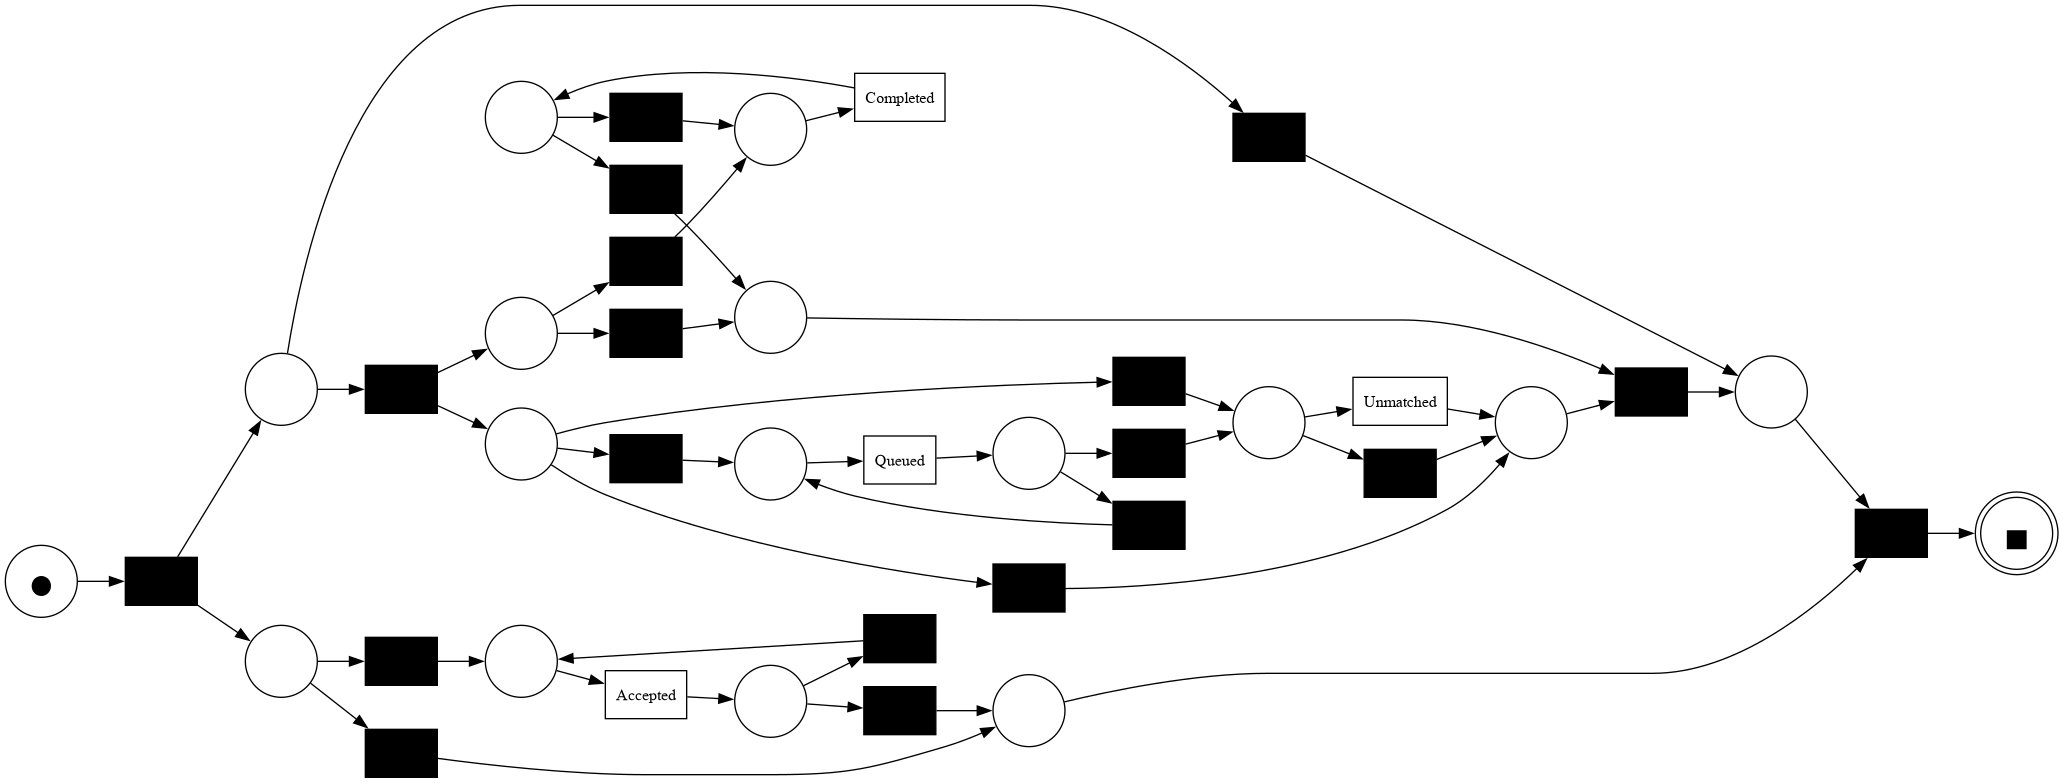

In [5]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [6]:
len(event_log['case:concept:name'].unique())

7554

In [7]:
event_log['concept:name'].unique()

array(['Accepted', 'Queued', 'Completed', 'Unmatched'], dtype=object)

In [8]:
list(event_log['org:resource'].unique())

['Frederic',
 'Anne Claire',
 'Eric',
 'Sarah',
 'Loic',
 'Siebel',
 'Adam',
 'Denny',
 'Paul',
 'Åse',
 'Joseph',
 'Björn T',
 'Suliman',
 'Jon',
 'Gustav',
 'Magnus',
 'Andreas',
 'Torbjörn',
 'Bert',
 'Luc',
 'Henk',
 'Earl',
 'Tsun Fai',
 'Juan',
 'Ilona',
 'Evy',
 'Reinier',
 'Olga',
 'Marcus',
 'Sandra',
 'Daniel',
 'Simon',
 'Marie',
 'Björn',
 'Mats',
 'Per',
 'Katia',
 'Elaine',
 'Rafael',
 'Marcin',
 'Tamara',
 'Marco',
 'Iván',
 'Valeria',
 'Fabrice',
 'Julien',
 'Adeline',
 'Bernard',
 'Jan',
 'Jens',
 'Pawel',
 'Annick',
 'Luiz',
 'Sue',
 'Stina',
 'Charan',
 'Josef',
 'Lucas',
 'Kent',
 'Nina',
 'Edward',
 'Rijin',
 'Ganesh',
 'Dawid',
 'Abdul',
 'Mica',
 'Maria',
 'Kari',
 'Mattias',
 'Luis',
 'Lars',
 'Riitta',
 'Ray',
 'Christopher',
 'Paulina',
 'Annica',
 'Thomas',
 'Tomas',
 'Christine',
 'Martin',
 'Niklas',
 'Laleh',
 'Magali',
 'Paulo',
 'Izabela',
 'Anna',
 'Urszula',
 'Varghese',
 'Saidur',
 'Piotr',
 'Marika',
 'Johanna',
 'Johan',
 'Janice',
 'Brian',
 'Nicla

In [9]:
len(event_log['org:resource'].unique())

1440

In [10]:
event_log[event_log['case:concept:name'] == '1-364285768']

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name,id
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768,0
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768,1
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768,2
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768,3
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768,4
5,V13 2nd 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:47+00:00,1-364285768,5
6,V13 2nd 3rd,France,fr,Anne Claire,Org line A2,A2_5,Completed,Medium,PROD582,Resolved,2010-04-06 16:44:51+00:00,1-364285768,6
7,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:45:07+00:00,1-364285768,7
8,V30,France,fr,Eric,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-04-08 12:52:23+00:00,1-364285768,8
9,V5 3rd,France,fr,Eric,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-04-08 12:53:35+00:00,1-364285768,9


In [11]:
start_end_event_log = TransformEventLog.start_end_event_log_next(event_log, unique_column='id')

In [12]:
start_end_event_log

,org:group_start,resource country_start,organization country_start,org:resource_start,organization involved_start,org:role_start,concept:name_start,impact_start,product_start,lifecycle:transition_start,time:timestamp_start,case:concept:name,id_start,org:group_complete,resource country_complete,organization country_complete,org:resource_complete,organization involved_complete,org:role_complete,concept:name_complete,impact_complete,product_complete,lifecycle:transition_complete,time:timestamp_complete,id_complete,duration,duration_seconds,duration_ms,duration_hours
17,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768,0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1,0 days 00:01:14,74.0,74000.0,0.020556
35,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768,1,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,2,0 days 00:44:52,2692.0,2692000.0,0.747778
53,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768,2,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,3,5 days 22:58:19,514699.0,514699000.0,142.971944
71,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768,3,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,4,0 days 00:00:31,31.0,31000.0,0.008611
89,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768,4,V13 2nd 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:47+00:00,5,0 days 00:00:09,9.0,9000.0,0.002500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007698,D3,Brazil,br,Cristiane,Org line B,A2_1,Completed,Medium,PROD126,Resolved,2012-05-07 21:06:53+00:00,1-740865969,65524,D3,0,br,Siebel,Org line B,A2_1,Completed,Medium,PROD126,Closed,2012-05-08 01:05:32+00:00,65525,0 days 03:58:39,14319.0,14319000.0,3.977500
1007703,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Low,PROD424,In Progress,2012-05-05 04:01:21+00:00,1-740866691,65526,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Low,PROD424,In Progress,2012-05-05 04:01:58+00:00,65527,0 days 00:00:37,37.0,37000.0,0.010278
1007707,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Low,PROD424,In Progress,2012-05-05 04:01:58+00:00,1-740866691,65527,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 04:07:43+00:00,65528,0 days 00:05:45,345.0,345000.0,0.095833
1007712,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 06:58:40+00:00,1-740866708,65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 07:02:39+00:00,65530,0 days 00:03:59,239.0,239000.0,0.066389


In [13]:
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [14]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'concept:name_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:resource_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:role_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')

In [15]:
start_end_event_log = start_end_event_log.sort_values(by='time:timestamp_start')

In [16]:
start_end_event_log[start_end_event_log['case:concept:name'] == '1-364285768']

org:group_start resource country_start organization country_start  \
0              V30                 France                         fr   
1              V30                 France                         fr   
2           V5 3rd                 France                         fr   
3           V5 3rd                 France                         fr   
4              V30                 France                         fr   
5      V13 2nd 3rd                 France                         fr   
6      V13 2nd 3rd                 France                         fr   
7              V30                 France                         fr   
8              V30                 France                         fr   
9           V5 3rd                 France                         fr   
10          V5 3rd                 France                         fr   
11          V5 3rd                 France                         fr   
12          V5 3rd                 France                         fr   
13          V5 3rd                 France                         fr   
14          V5 3rd                 France                         fr   
15          V5 3rd                 France                         fr   

   org:resource_start organization involved_start org:role_start  \
0            Frederic                 Org line A2           A2_4   
1            Frederic                 Org line A2           A2_4   
2            Frederic                 Org line A2           A2_5   
3         Anne Claire                 Org line A2           A2_5   
4         Anne Claire                 Org line A2           A2_4   
5         Anne Claire                 Org line A2           A2_5   
6         Anne Claire                 Org line A2           A2_5   
7         Anne Claire                 Org line A2           A2_4   
8                Eric                 Org line A2           A2_4   
9                Eric                 Org line A2           A2_5   
10        Anne Claire                 Org line A2           A2_5   
11        Anne Claire                 Org line A2           A2_5   
12              Sarah                 Org line A2           A2_5   
13              Sarah                 Org line A2           A2_5   
14               Loic                 Org line A2           A2_5   
15               Loic                 Org line A2           A2_5   

   concept:name_start impact_start product_start lifecycle:transition_start  \
0            Accepted       Medium       PROD582                In Progress   
1            Accepted       Medium       PROD582                In Progress   
2              Queued       Medium       PROD582        Awaiting Assignment   
3            Accepted       Medium       PROD582                In Progress   
4              Queued       Medium       PROD582        Awaiting Assignment   
5            Accepted       Medium       PROD582                In Progress   
6           Completed       Medium       PROD582                   Resolved   
7              Queued       Medium       PROD582        Awaiting Assignment   
8            Accepted       Medium       PROD582                In Progress   
9              Queued       Medium       PROD582        Awaiting Assignment   
10           Accepted       Medium       PROD582                In Progress   
11           Accepted       Medium       PROD582                   Assigned   
12           Accepted       Medium       PROD582                In Progress   
13           Accepted       Medium       PROD582                   Assigned   
14           Accepted       Medium       PROD582                In Progress   
15          Completed       Medium       PROD582                   Resolved   

        time:timestamp_start case:concept:name  id_start org:group_complete  \
0  2010-03-31 16:59:42+00:00       1-364285768         0                V30   
1  2010-03-31 17:00:56+00:00       1-364285768         1             V5 3rd   
2  2010-03-31 17:45:48+00:00       1-364

In [17]:
start_end_event_log

org:group_start resource country_start organization country_start  \
0                 V30                 France                         fr   
1                 V30                 France                         fr   
2              V5 3rd                 France                         fr   
3              V5 3rd                 France                         fr   
4                 V30                 France                         fr   
...               ...                    ...                        ...   
3690          V37 2nd            Netherlands                         nl   
4015          V37 2nd            Netherlands                         nl   
4016          V37 2nd            Netherlands                         nl   
10269         V37 2nd            Netherlands                         nl   
10270         V37 2nd            Netherlands                         nl   

      org:resource_start organization involved_start org:role_start  \
0               Frederic                 Org line A2           A2_4   
1               Frederic                 Org line A2           A2_4   
2               Frederic                 Org line A2           A2_5   
3            Anne Claire                 Org line A2           A2_5   
4            Anne Claire                 Org line A2           A2_4   
...                  ...                         ...            ...   
3690                Juan                Org line V7n              0   
4015                Juan                Org line V7n              0   
4016                Juan                Org line V7n              0   
10269               Juan                Org line V7n              0   
10270               Juan                Org line V7n              0   

      concept:name_start impact_start product_start  \
0               Accepted       Medium       PROD582   
1               Accepted       Medium       PROD582   
2                 Queued       Medium       PROD582   
3               Accepted       Medium       PROD582   
4                 Queued       Medium       PROD582   
...                  ...          ...           ...   
3690           Completed       Medium       PROD542   
4015            Accepted       Medium       PROD542   
4016           Completed       Medium       PROD542   
10269           Accepted       Medium       PROD542   
10270          Completed       Medium       PROD542   

      lifecycle:transition_start      time:timestamp_start case:concept:name  \
0                    In Progress 2010-03-31 16:59:42+00:00       1-364285768   
1                    In Progress 2010-03-31 17:00:56+00:00       1-364285768   
2            Awaiting Assignment 2010-03-31 17:45:48+00:00       1-364285768   
3                    In Progress 2010-04-06 16:44:07+00:00       1-364285768   
4            Awaiting Assignment 2010-04-06 16:44:38+00:00       1-364285768   
...                          ...                       ...               ...   
3690                    Resolved 2012-05-18 15:09:41+00:00       1-696831586   
4015                 In Progress 2012-05-18 15:21:47+00:00       1-698065363   
4016                    Resolved 2012-05-18 15:26:02+00:00       1-698065363   
10269                In Progress 2012-05-18 16:54:28+00:00       1-720121244   
10270                   Resolved 2012-05-18 16:59:02+00:00       1-720121244   

       id_start org:group_complete resource country_complete  \
0             0                V30                    France   
1             1             V5 3rd                    France   
2             2             V5 3rd                    France   
3             3                V30                    France   
4             4        V13 2nd 3rd                    France   
...         ...                ...                       ...   
3690       3896            V37 2nd                   Belgium   
4015       4240            V37 2nd               Netherlands   
4016       4241            V37 2nd                   B

In [18]:
start_end_event_log.to_csv('../transformed_event_logs/BPIC_2013_incidents_start_end.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
start_end_event_log.to_pickle('../transformed_event_logs/BPIC_2013_incidents_start_end.pickle')